In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

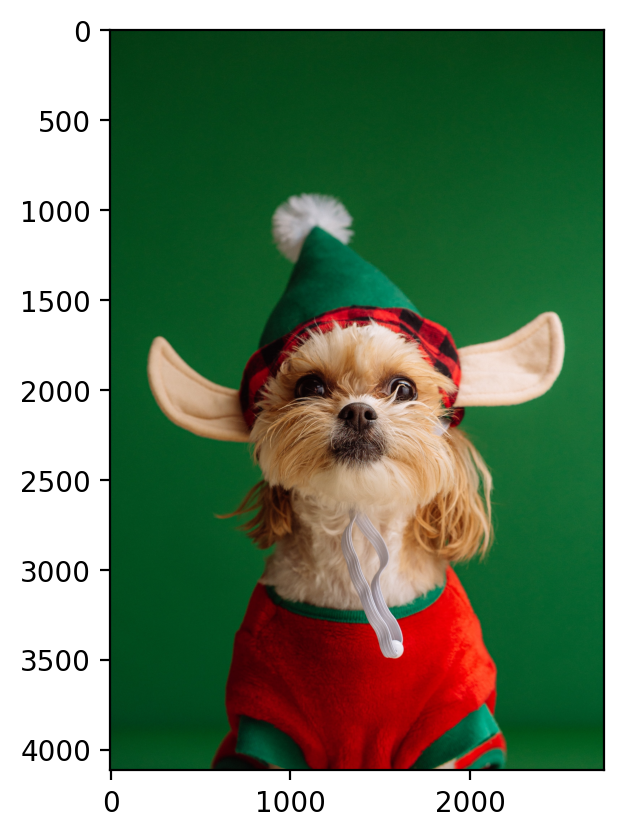

In [3]:
img = cv2.imread(r'1.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

x 0.668
resized height 2054


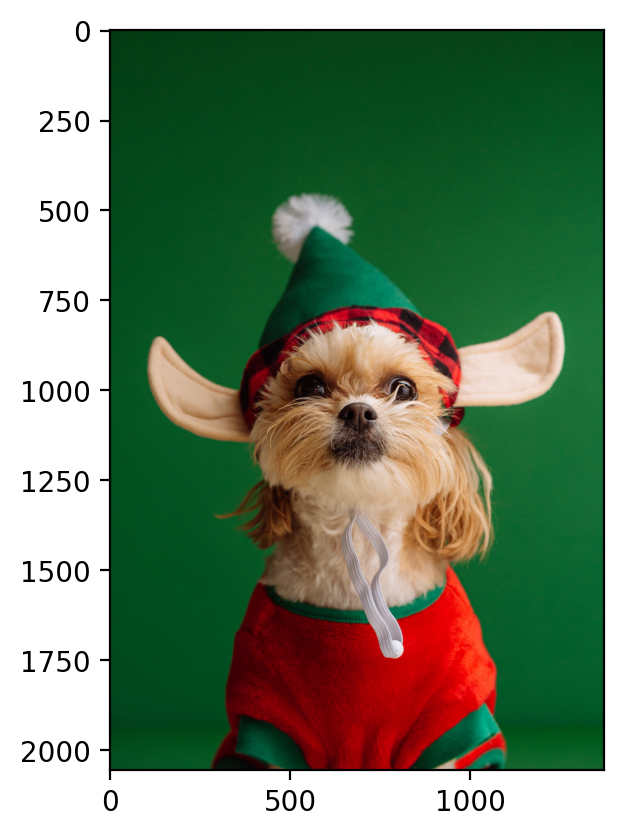

In [13]:
height, width, channels = rgb_img.shape
x = width/height
resized_width = 1372
new_size = (resized_width, int(resized_width/x))
resized_img = cv2.resize(rgb_img, new_size, interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)
print(f'x {x:.3f}')
print(f'resized height {new_size[1]}')

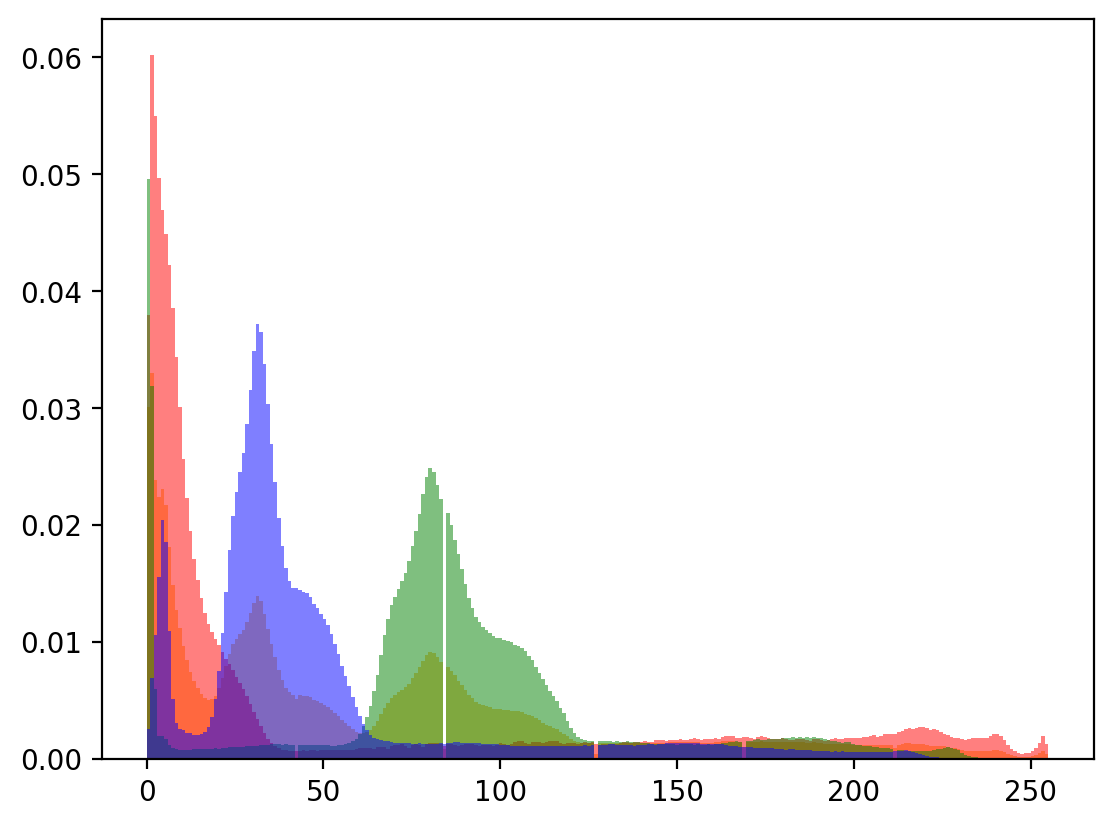

In [38]:
hist = plt.hist(resized_img.ravel(),256,color='orange',alpha=0.5,density=True)
r_hist = plt.hist(resized_img[:, : , 0].ravel(), bins = 256, color = 'red', alpha = 0.5, density = True)
g_hist = plt.hist(resized_img[:, :, 1].ravel(), bins = 256, color = 'green', alpha = 0.5, density = True)
b_hist = plt.hist(resized_img[:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5, density = True)
plt.xlabel = 'intensity'
plt.ylabel = 'frequency'
plt.show()

In [40]:
r_density, g_density, b_density = 0, 0, 0
for i in range(0, len(r_hist[0])):
  if r_hist[0][i] > r_density:
    r_density = r_hist[0][i]
  if g_hist[0][i] > g_density:
    g_density = g_hist[0][i]
  if b_hist[0][i] > b_density:
    b_density = b_hist[0][i]

print(f'max density {max(r_density, g_density, b_density):.4f}')

max density 0.0602


intesity [222 216 206]


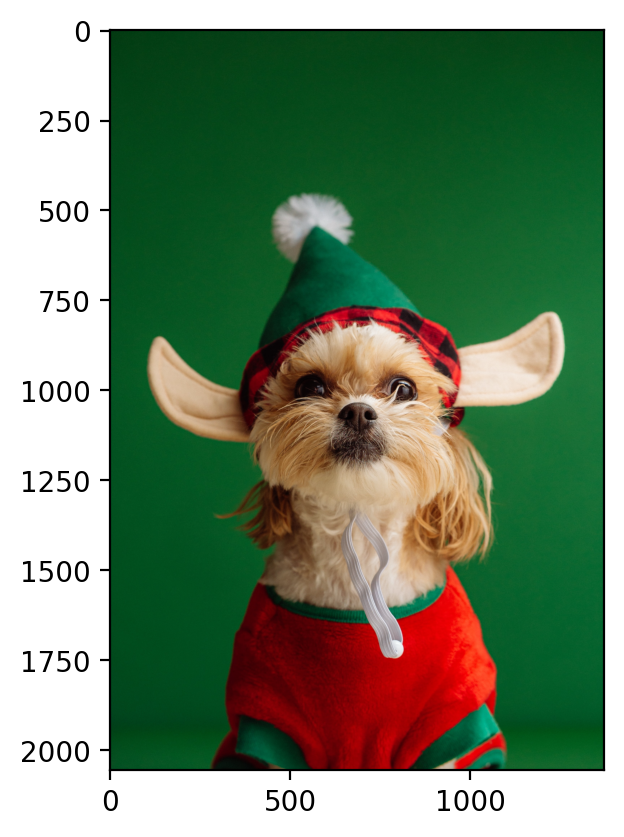

In [41]:
rgb_img_norm = resized_img
rgb_img_norm[:, :, 0] = (rgb_img_norm[:, :, 0] - np.min(rgb_img_norm[:, :, 0])) / (np.max(rgb_img_norm[:, :, 0]) - np.min(rgb_img_norm[:, :, 0])) * 255
rgb_img_norm[:, :, 1] = (rgb_img_norm[:, :, 1] - np.min(rgb_img_norm[:, :, 1])) / (np.max(rgb_img_norm[:, :, 1]) - np.min(rgb_img_norm[:, :, 1])) * 255
rgb_img_norm[:, :, 2] = (rgb_img_norm[:, :, 2] - np.min(rgb_img_norm[:, :, 2])) / (np.max(rgb_img_norm[:, :, 2]) - np.min(rgb_img_norm[:, :, 2])) * 255
plt.imshow(rgb_img_norm)
plt.show
x = 1032
y = 678
print(f'intesity {rgb_img_norm[x,y]}')

<function matplotlib.pyplot.show(close=None, block=None)>

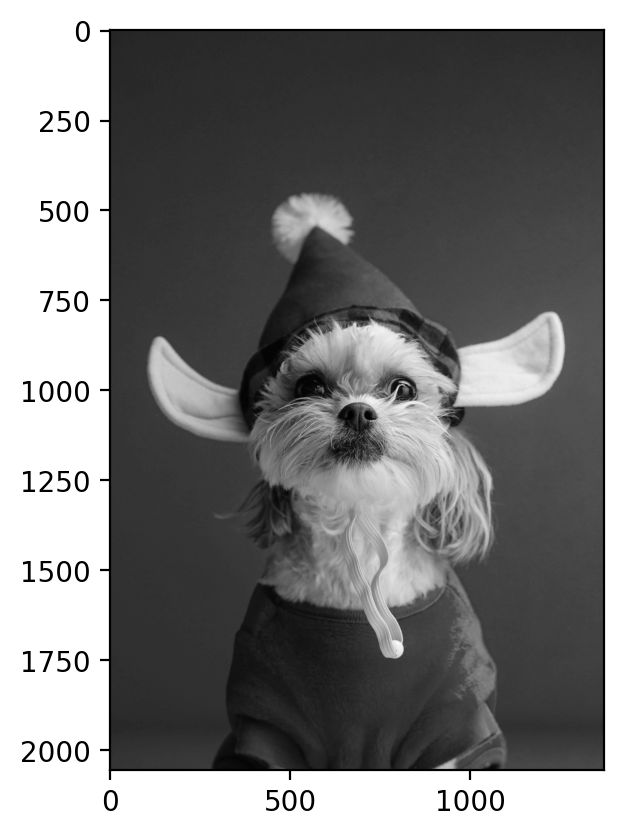

In [42]:
img = rgb_img_norm
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap = 'gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

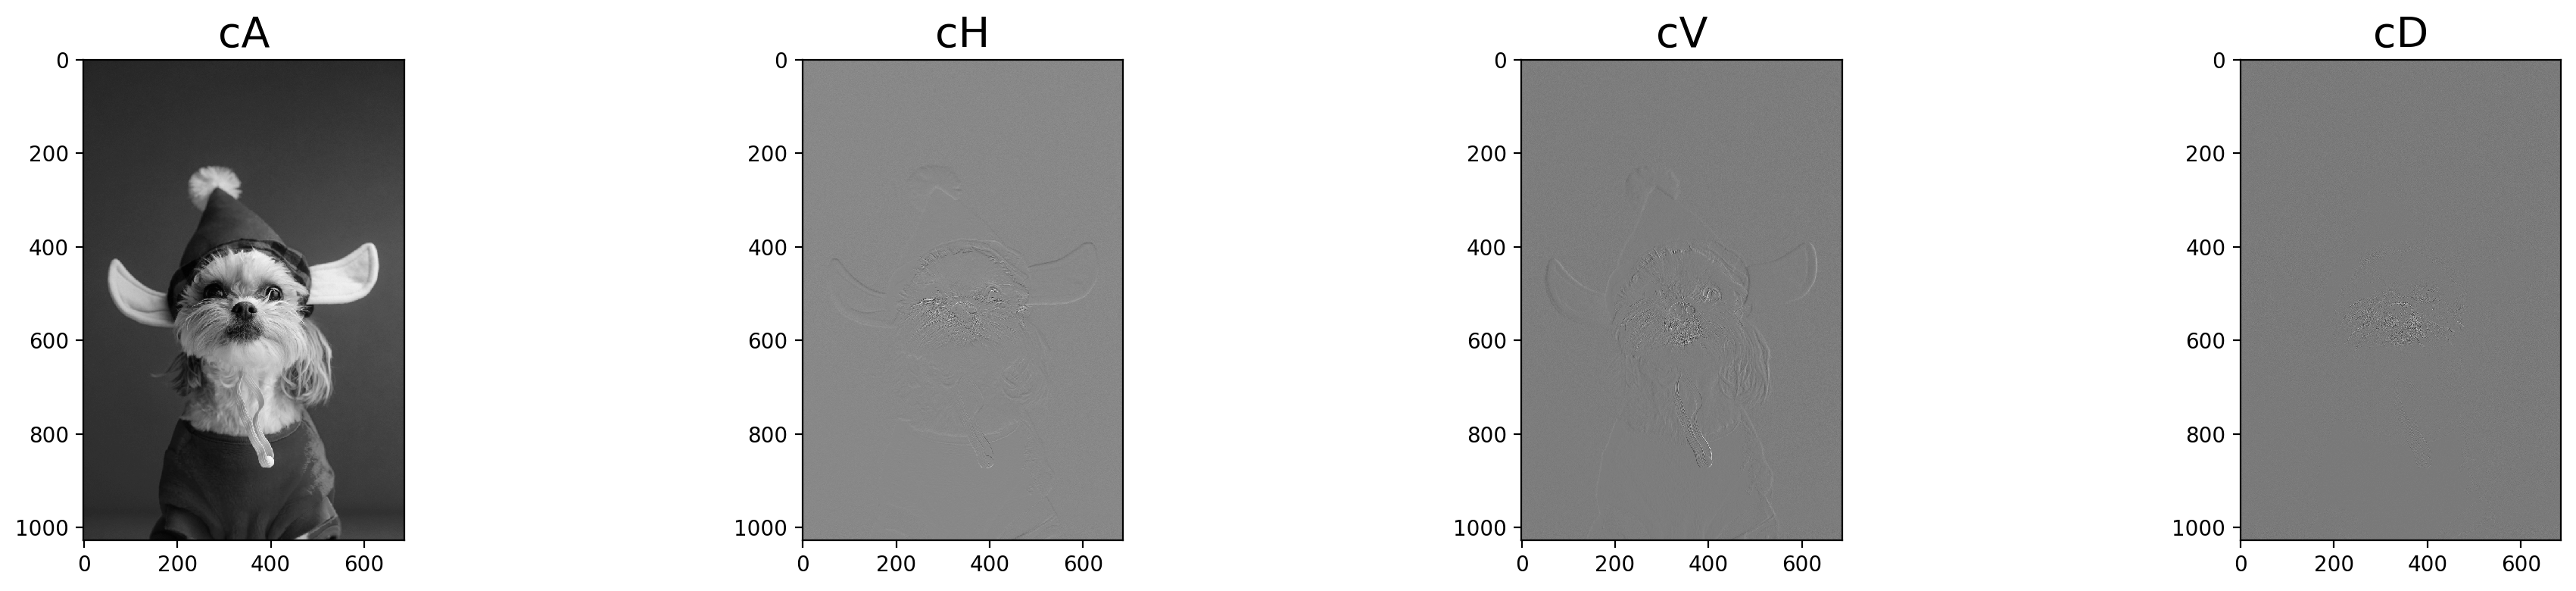

In [43]:
import pywt
c = pywt.dwt2(gray_img, 'haar')
cA, (cH, cV, cD) = c
titles = ['cA', 'cH', 'cV', 'cD']
res = plt.figure(figsize=(20, 4))
for i, a in enumerate([cA, cH, cV, cD]):
    ax = res.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation = 'nearest', cmap = 'gray')
    ax.set_title(titles[i], fontsize = 20)
res.tight_layout()
plt.show




In [44]:
c1 = pywt.dwt2(cA, 'haar')
cA1, (cH1, cV1, cD1) = c1

In [45]:

threshold = 120
h1 = cA1.shape[0]
for i in range(h1):
      c1[0][i][np.abs(c1[0][i])<threshold] = 0.0
      for j in range(len(c1[1])):
         c1[1][j][i][np.abs(c1[1][j][i])<threshold] = 0.0
print((sum(sum(sum(c1[1][m][n] == 0) for n in range(h1)) for m in range(len(c1[1])))) + sum(sum(c1[0][m] == 0) for m in range(h1)))

536805
